# Student Dropout and Academic Success
Dataset Information
For what purpose was the dataset created?
- The dataset was created in a project that aims to contribute to the reduction of academic dropout and failure in higher education, by using machine learning techniques to identify students at risk at an early stage of their academic path, so that strategies to support them can be put into place. 
- The dataset includes information known at the time of student enrollment – academic path, demographics, and social-economic factors. 
- The problem is formulated as a three category classification task (dropout, enrolled, and graduate) at the end of the normal duration of the course. 

Who funded the creation of the dataset?
- This dataset is supported by program SATDAP - Capacitação da Administração Pública under grant POCI-05-5762-FSE-000191, Portugal.

What do the instances in this dataset represent?
- Each instance is a student

Are there recommended data splits?
- The dataset was used, in our project, with a data split of 80% for training and 20% for test.

Was there any data preprocessing performed?
- We performed a rigorous data preprocessing to handle data from anomalies, unexplainable outliers, and missing values.

### Import Packages

In [85]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt 
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [50]:
warnings.filterwarnings('ignore')

### Import Dataset

In [51]:
# fetch dataset 
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 
  
# data (as pandas dataframes) 
X = predict_students_dropout_and_academic_success.data.features 
y = predict_students_dropout_and_academic_success.data.targets 
  
# metadata 
print(predict_students_dropout_and_academic_success.metadata) 
  
# variable information 
print(predict_students_dropout_and_academic_success.variables) 


{'uci_id': 697, 'name': "Predict students' dropout and academic success", 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success', 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv', 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.", 'area': 'Other', '

# Exploratory Data Analysis
- Converting Features & Target in DataFrame
- Information about Features and Target
- Describing Dataset
- Corrleation between Features and Target
- Dropping Features with less correlations
- N-Unique Values in Target 
- Value counts in Target 
- Checking Missing Values
- Checking for the outliers

### Converting Features & Target in DataFrame

In [52]:
df_features = pd.DataFrame(X)
df_target = pd.DataFrame(y)

### Information about Features and Target

In [53]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [54]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  4424 non-null   object
dtypes: object(1)
memory usage: 34.7+ KB


### Describing Dataset

In [55]:
df_features.describe()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


### Corrlations between Features and Target

In [56]:
df_corr = pd.concat([df_features,pd.get_dummies(df_target)],axis=1).corr()

In [57]:
print(df_corr['Target_Dropout'].sort_values(ascending=False))

Target_Dropout                                    1.000000
Age at enrollment                                 0.254215
Debtor                                            0.229407
Gender                                            0.203983
Application mode                                  0.198458
Marital Status                                    0.093712
Curricular units 2nd sem (without evaluations)    0.079901
Mother's qualification                            0.064958
Curricular units 1st sem (without evaluations)    0.054230
Previous qualification                            0.049379
Inflation rate                                    0.027826
Father's qualification                            0.018295
Unemployment rate                                 0.012980
Nacionality                                       0.008346
Educational special needs                         0.002806
International                                    -0.010360
Mother's occupation                              -0.0219

In [58]:
df_corr['Target_Enrolled'].sort_values(ascending=False)

Target_Enrolled                                   1.000000
Curricular units 2nd sem (evaluations)            0.162607
Curricular units 1st sem (evaluations)            0.116654
Tuition fees up to date                           0.095864
Curricular units 2nd sem (grade)                  0.079635
Mother's occupation                               0.066563
Father's occupation                               0.063434
Curricular units 1st sem (grade)                  0.046781
Gender                                            0.034214
Application mode                                  0.030247
Curricular units 1st sem (without evaluations)    0.027029
Curricular units 2nd sem (without evaluations)    0.023171
Daytime/evening attendance                        0.022073
International                                     0.016106
Nacionality                                       0.013946
GDP                                               0.010575
Educational special needs                         0.0101

In [59]:
df_corr['Target_Graduate'].sort_values(ascending=False)

Target_Graduate                                   1.000000
Curricular units 2nd sem (approved)               0.576840
Curricular units 1st sem (approved)               0.492443
Curricular units 2nd sem (grade)                  0.472864
Curricular units 1st sem (grade)                  0.412982
Tuition fees up to date                           0.327197
Scholarship holder                                0.299484
Curricular units 2nd sem (enrolled)               0.180197
Curricular units 1st sem (enrolled)               0.160661
Admission grade                                   0.125263
Previous qualification (grade)                    0.111278
Displaced                                         0.102329
Application order                                 0.093670
Curricular units 2nd sem (credited)               0.065073
Daytime/evening attendance                        0.058235
Curricular units 1st sem (credited)               0.058157
GDP                                               0.0351

### Dropping Features with less correlations

In [60]:
drop_features = ['Application order','Curricular units 2nd sem (credited)','Daytime/evening attendance','Curricular units 1st sem (credited)',
                 'GDP','Course','Unemployment rate','Curricular units 2nd sem (evaluations)',"Father's qualification",'International',
                 'Curricular units 1st sem (evaluations)']

df_features = df_features.drop(drop_features,axis=1)

In [61]:
df_features.columns

Index(['Marital Status', 'Application mode', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Mother's occupation', 'Father's occupation',
       'Admission grade', 'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Inflation rate'],
      dtype='object')

### N-Unique Values in Target

In [62]:
df_target.nunique()

Target    3
dtype: int64

### Value counts in Target

In [63]:
df_target.value_counts()

Target  
Graduate    2209
Dropout     1421
Enrolled     794
dtype: int64

### Checking for Missing Values

In [64]:
df_features.isnull().sum()

Marital Status                                    0
Application mode                                  0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
Curricular units 1st sem (enrolled)               0
Curricular units 1st sem (approved)               0
Curricular units 1st sem (grade)                  0
Curricular u

### Checking for the outliers

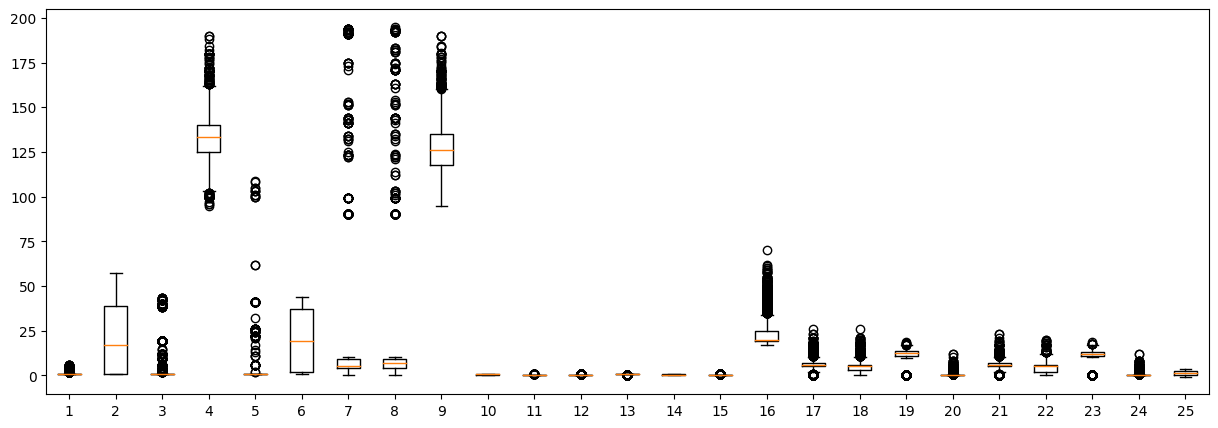

In [65]:
plt.figure(figsize=(15,5))
plt.boxplot(df_features)
plt.show()

## Data Preprocessing 
- Encoding of Data
- Scaling of Data
- Removing outliers
- Finding Missing values
- Train test split

### Data Encoding

In [66]:
encoder = OrdinalEncoder()
df_target_encoded = encoder.fit_transform(df_target)

### Stardardization of Data

In [67]:
scaler = StandardScaler()
df_features_scaled = scaler.fit_transform(df_features)
df_features_scaled = pd.DataFrame(df_features_scaled,columns=df_features.columns)

### Removing Outliers

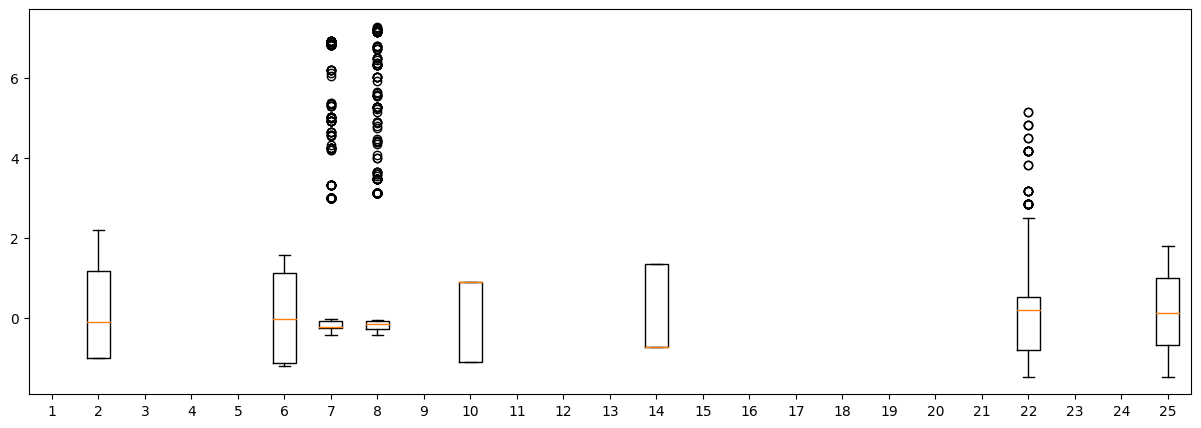

In [68]:
Q1 = df_features.quantile(0.25)
Q3 = df_features.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_features_NoOutliers = df_features_scaled[(df_features_scaled >= lower_bound) & (df_features_scaled <= upper_bound)]
plt.figure(figsize=(15,5))
plt.boxplot(df_features_NoOutliers)
plt.show()

### Filling Missing Values

In [69]:
imputer = SimpleImputer()
df_features_NoNaN = imputer.fit_transform(df_features_NoOutliers)

In [70]:
print(np.isnan(df_features_NoNaN).sum())
print(np.shape(df_features_NoNaN))

0
(4424, 11)


In [71]:
df_features_prepared = pd.DataFrame(df_features_NoNaN)
df_target_prepared = pd.DataFrame(df_target_encoded,columns=df_target.columns)

### Train Test split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(df_features_prepared,df_target_prepared,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(3539, 11) (885, 11)
(3539, 1) (885, 1)


## Model Building 
- Model selection
- Model Evaluation
    - Cross Validation Score
    - Cross Validation Predict
    - Confusion Matrix
    - Precision
    - Recall 
    - F1 Score
- Model Hyperparameter Tuning
- Model Fitting on Test set


### Model Selection

In [73]:
logistic_reg = LogisticRegression()
adaBoost_clf = AdaBoostClassifier(LogisticRegression(),n_estimators=200,algorithm='SAMME.R',learning_rate=0.5)
bagging_clf = BaggingClassifier(LogisticRegression(),n_estimators=20,n_jobs=-1,bootstrap=True)
forest_clf = RandomForestClassifier(n_estimators=50,oob_score=True,n_jobs=-1)
gradient_clf = GradientBoostingClassifier(max_depth=2,n_estimators=6,learning_rate=0.5)

### Model Evaluation

### Cross validation score

In [81]:
for estimators in (logistic_reg,adaBoost_clf,bagging_clf,forest_clf,gradient_clf):
    score = cross_val_score(estimators,X_train,y_train,cv=3,scoring='accuracy')
    print(f"Estimator:{estimators.__class__.__name__}\nScore:{score}\n")

Estimator:LogisticRegression
Score:[0.73220339 0.71440678 0.72773537]

Estimator:AdaBoostClassifier
Score:[0.69745763 0.70508475 0.70992366]

Estimator:BaggingClassifier
Score:[0.73389831 0.71610169 0.72603902]

Estimator:RandomForestClassifier
Score:[0.70677966 0.71186441 0.71077184]

Estimator:GradientBoostingClassifier
Score:[0.71440678 0.7279661  0.72943172]



### Cross Validation Predict

In [80]:
for estimators in (logistic_reg,adaBoost_clf,bagging_clf,forest_clf,gradient_clf):
    val_pred = cross_val_predict(estimators,X_train,y_train,cv=3)
    print(f'Estimator:{estimators.__class__.__name__}\nPrecision:{precision_score(y_train,val_pred,average="weighted")}\nRecall:{recall_score(y_train,val_pred,average="weighted")}\nF1 Score:{f1_score(y_train,val_pred,average="weighted")}\n')

Estimator:LogisticRegression
Precision:0.6948243018951131
Recall:0.7247810115851936
F1 Score:0.6749302044454011

Estimator:AdaBoostClassifier
Precision:0.6682866092134436
Recall:0.7041537157389093
F1 Score:0.672541277115288

Estimator:BaggingClassifier
Precision:0.6958392110618472
Recall:0.7259112743712913
F1 Score:0.6755844571415224

Estimator:RandomForestClassifier
Precision:0.6897268163775879
Recall:0.7140435151172647
F1 Score:0.6958986757051215

Estimator:GradientBoostingClassifier
Precision:0.6933866065285196
Recall:0.7239333144956203
F1 Score:0.6976692959237776



### Confusion Matrix

LogisticRegression


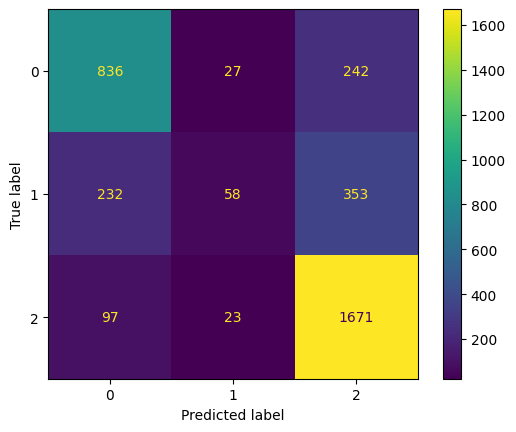

AdaBoostClassifier


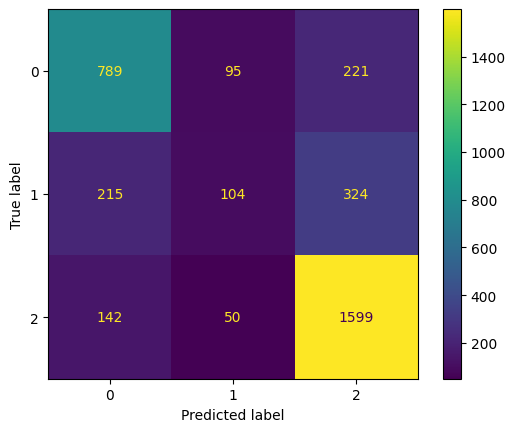

BaggingClassifier


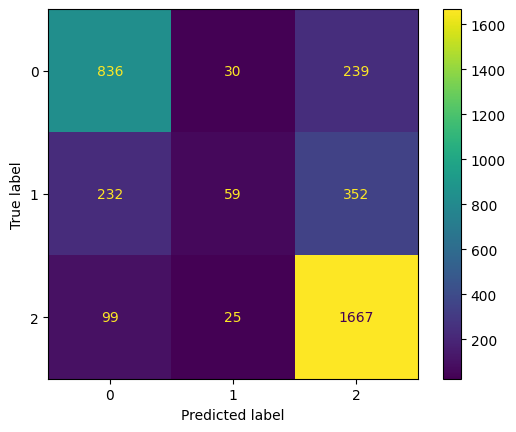

RandomForestClassifier


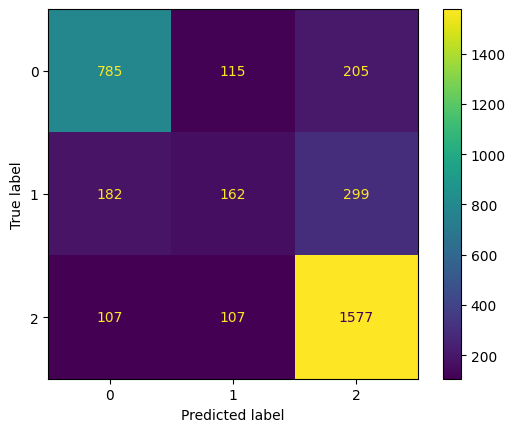

GradientBoostingClassifier


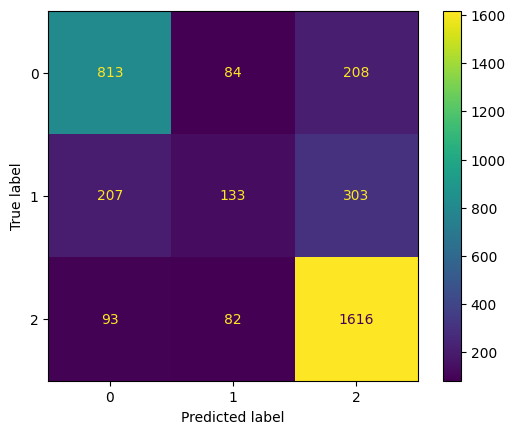

In [79]:
for estimators in (logistic_reg,adaBoost_clf,bagging_clf,forest_clf,gradient_clf):
    conf_pred = cross_val_predict(estimators,X_train,y_train,cv=3)
    confusion_mat = confusion_matrix(y_train,conf_pred)
    print(estimators.__class__.__name__)
    ConfusionMatrixDisplay(confusion_matrix=confusion_mat).plot()
    plt.show()

### Model Hyperparameter Tuning

In [83]:
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage to prevent overfitting
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

grid_search = GridSearchCV(estimator=gradient_clf,param_grid=param_grid,cv=3,n_jobs=-1)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(learning_rate=0.5,
                                                  max_depth=2, n_estimators=6),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [84]:
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

{'learning_rate': 0.2, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
0.7358019100741315
GradientBoostingClassifier(learning_rate=0.2, max_depth=2, min_samples_leaf=4)


### Model Fitting on a test set

In [86]:
final_model = grid_search.best_estimator_
y_pred = final_model.predict(X_test)
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.69      0.74       316
         1.0       0.43      0.23      0.30       151
         2.0       0.73      0.92      0.82       418

    accuracy                           0.72       885
   macro avg       0.65      0.61      0.62       885
weighted avg       0.70      0.72      0.70       885



### `NOTE:` End to End Machine learning project for Student Dropout and Academic Success. Visit more on:www.github.com/itechdp